# Generate D-efficient designs

This notebook contains example code from the article [Two-level designs to estimate all main effects and two-factor interactions](https://doi.org/10.1080/00401706.2016.1142903). by Eendebak, P. T. and Schoen, E. D.
This example shows how to generate D-efficient designs with a user-specified optimization function. For details on D-efficient designs, see [Pieter: LINK TO STATISTICAL PROPERTIES].

Load the libraries and functions.

In [3]:
import numpy as np
import oapackage
import oapackage.Doptim

Define the class of designs to generate.

In [4]:
N=40 # Run size
k=7 # Number of factors
s=2 # Number of factor levels
strength=2 # Strength of the design
arrayclass=oapackage.arraydata_t(s, N, strength, k)
print('We generate D-efficient designs with %d rows and %d columns\n' % (N, k) )

We generate D-efficient designs with 40 rows and 7 columns



Generate a single D-efficient design using $\alpha=(1,2,0)$ as the parameters for the optimization function. For details on this parameter and its corresponding optimization function, see :cite:`EendebakSO`.

In [59]:
alpha=[1,2,0]
scores, design_efficiencies, designs, ngenerated = oapackage.Doptimize(arrayclass, nrestarts=30, optimfunc=alpha, selectpareto=True)

Doptim: optimization class 40.2-2-2-2-2-2-2
Doptimize: iteration 0/30
Doptimize: iteration 29/30
Doptim: done (9 arrays, 1.5 [s])


In [35]:
print('\nGenerated %d designs, the efficiencies for these designs are:' % len(designs))
for ii, d in enumerate(designs):
    dd = d.Defficiencies()
    print('array %d: D-efficiency %.4f, Ds-efficiency %.4f' % (ii, dd[0], dd[1]) )

D=[d.Defficiency() for d in designs]
best=np.argmax(D)
print('\nThe design with the highest D-efficiency (%.4f) is:\n' % D[best] )

designs[best].transposed().showarraycompact()


Generated 10 designs, the efficiencies for these designs are:
array 0: D-efficiency 0.8875, Ds-efficiency 0.9884
array 1: D-efficiency 0.9144, Ds-efficiency 0.9606
array 2: D-efficiency 0.9076, Ds-efficiency 0.9628
array 3: D-efficiency 0.9040, Ds-efficiency 0.9627
array 4: D-efficiency 0.8829, Ds-efficiency 0.9631
array 5: D-efficiency 0.9041, Ds-efficiency 0.9501
array 6: D-efficiency 0.8921, Ds-efficiency 0.9518
array 7: D-efficiency 0.8972, Ds-efficiency 0.9434
array 8: D-efficiency 0.8941, Ds-efficiency 0.9435
array 9: D-efficiency 0.8834, Ds-efficiency 0.9471

The design with the highest D-efficiency (0.9144) is:

0101010001111011100000000110110111101010
0111011101100000110010100001011110011011
0101011110101001000110111111011100001000
0011111100100111110111010101010011000000
1010000101111111101000011000001100111000
0010110010010001101010010011011101001011
0110001010110100000011011100010011111101


Optimizing with a different optimization target leads to different D-efficient designs. Below we compare the sets of designs generated with
optimization target [1,0,0] and [1,2,0].

In [61]:
scores0, design_efficiencies0, designs0, _ = oapackage.Doptimize(arrayclass, nrestarts=30, optimfunc=[1,0,0], selectpareto=True)

Doptim: optimization class 40.2-2-2-2-2-2-2
Doptimize: iteration 0/30
Doptimize: iteration 29/30
Doptim: done (8 arrays, 1.6 [s])


Pareto: 16 optimal values, 17 objects


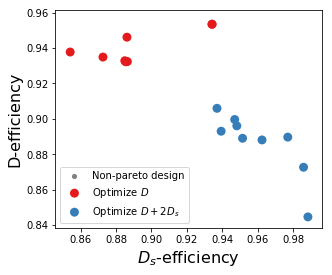

<Figure size 432x288 with 0 Axes>

In [62]:
def combineEfficiencyData(lst):
    data = np.zeros((0, 4))

    for jj, dds in enumerate(lst):
            dds_index=np.hstack((dds, jj * np.ones( (len(dds),1)) ) )
            data=np.vstack( (data, dds_index) )
    return data
                        
design_efficiencies_combined=combineEfficiencyData([design_efficiencies0, design_efficiencies])
plot_handles=oapackage.generateDscatter(design_efficiencies_combined, ndata=3, lbls=['Optimize $D$','Optimize $D+2D_s$'], verbose=0)